In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys

In [2]:
%pwd

'/mnt/d/Documents/masters_classes/COVID_case_prediction'

In [7]:
Covid19_symptomFiles = []

directories = [d for d in os.listdir('.') if d.endswith('symptoms')]


for dir1 in directories:
    for root, dirs, files in os.walk(dir1):
        for file in files:
            path = f'./{dir1}/{file}'
            Covid19_symptomFiles.append(path)

len(Covid19_symptomFiles)

3

In [8]:
merge_df = pd.read_csv(Covid19_symptomFiles[0])
merge_df.drop(["country_region_code", "country_region", "sub_region_1_code", "sub_region_2_code"], axis=1, inplace=True)

for file in Covid19_symptomFiles[1:]:
    df = pd.read_csv(file)
    df.drop(["country_region_code", "country_region", "sub_region_1_code", "sub_region_2_code"], axis=1, inplace=True)
    merge_df = pd.concat([merge_df, df], ignore_index=True)
    del df
    
merge_df

,sub_region_1,sub_region_2,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-01,2.42,4.71,8.63,0.26,0.83,0.09,...,1.23,0.23,0.32,3.13,0.34,2.65,0.36,0.17,0.42,0.36
1,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-02,2.40,4.66,9.16,0.31,0.93,0.09,...,1.33,0.25,0.37,3.36,0.33,2.60,0.39,0.16,0.51,0.43
2,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-03,2.13,4.54,8.75,0.29,0.91,0.10,...,1.29,0.24,0.36,3.17,0.32,2.46,0.38,0.16,0.49,0.39
3,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-04,2.30,4.60,9.16,0.25,0.86,0.09,...,1.24,0.24,0.34,3.15,0.31,2.71,0.38,0.17,0.50,0.37
4,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-01-05,2.53,4.59,9.31,0.26,0.81,0.09,...,1.25,0.24,0.34,3.38,0.31,2.81,0.38,0.17,0.49,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43519,Wyoming,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-04-12,1.82,4.68,5.77,0.68,NaN,NaN,...,1.12,NaN,0.47,2.81,NaN,1.85,NaN,NaN,NaN,NaN
43520,Wyoming,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-04-13,2.12,4.24,5.79,0.47,0.46,NaN,...,0.75,NaN,0.55,2.90,NaN,1.57,0.45,NaN,0.50,NaN
43521,Wyoming,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-04-14,1.55,4.55,6.02,0.54,NaN,NaN,...,0.96,NaN,NaN,2.63,NaN,1.59,0.52,NaN,NaN,0.46
43522,Wyoming,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-04-15,1.60,4.33,5.71,NaN,NaN,NaN,...,1.14,NaN,NaN,2.34,NaN,1.81,0.65,NaN,NaN,0.83


([], [])

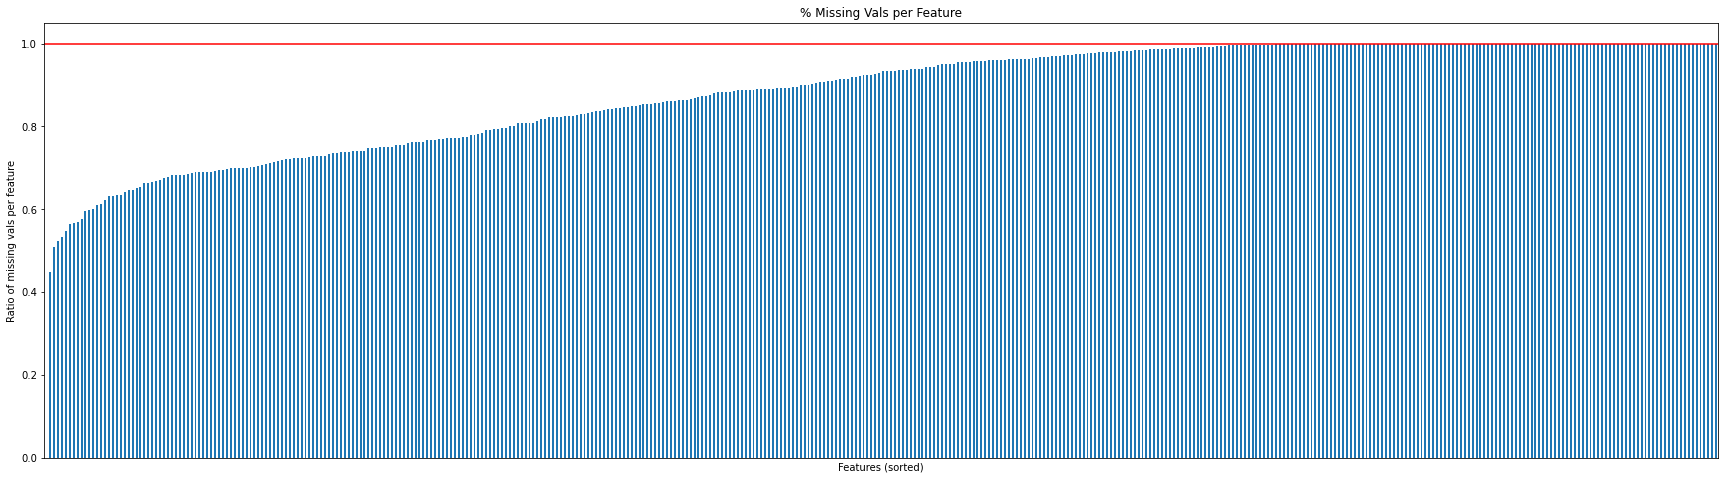

In [16]:
merge_df.notna().mean().sort_values().plot(kind='bar', figsize=(30,8),
                                          title="% Missing Vals per Feature",
                                          ylabel="Ratio of missing vals per feature",
                                          xlabel = "Features (sorted)")
plt.axhline(y=1.0, color = 'r', linestyle="-")
plt.xticks([])

Text(0, 0.5, 'Observation')

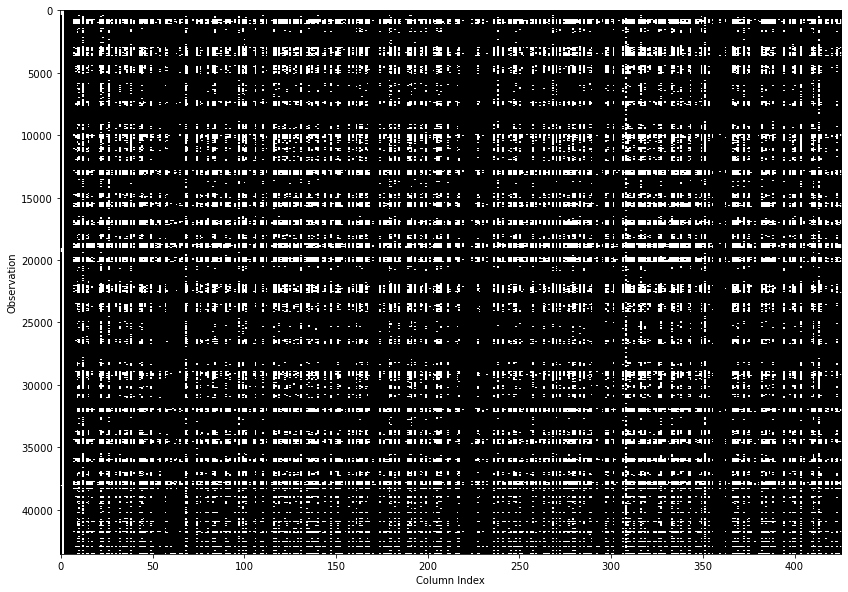

In [17]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(merge_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

ax.set_xlabel("Column Index")
ax.set_ylabel("Observation")

Most of the missing data appears to be in certain observations, or certain columns. Let's take a look at which of these need to be dropped.

In [20]:
# checking out observations first...

merge_df[merge_df.transpose().notna().mean().sort_values() < 0.60]["sub_region_1"].value_counts()

/tmp/ipykernel_810/4121969981.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.transpose().notna().mean().sort_values() < 0.60]["sub_region_1"].value_counts()


Alaska                  837
Vermont                 837
Wyoming                 837
North Dakota            831
South Dakota            801
Montana                 433
District of Columbia    256
Delaware                 89
Rhode Island              5
Maine                     2
Hawaii                    1
West Virginia             1
Name: sub_region_1, dtype: int64

There are 837 observations per state, so some states (Alaska, Vermont, Wyoming, ND, SD) have lots of clearly incomplete data. I'm going to remove these states and revisualize the missing values.

In [21]:
dropStates = ["Alaska", "Vermont", "Wyoming", "North Dakota", "South Dakota", "Montana", "District of Columbia", "Delaware", None]
merge_df = merge_df[~merge_df["sub_region_1"].isin(dropStates) & merge_df["sub_region_1"].notna()]
merge_df

,sub_region_1,sub_region_2,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
366,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-01,2.86,5.05,8.63,0.30,0.88,0.10,...,1.32,0.23,0.36,3.41,0.43,2.52,0.36,0.17,0.36,0.46
367,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-02,2.69,5.27,9.36,0.36,0.92,0.14,...,1.39,0.26,0.47,3.86,0.35,2.50,0.40,0.17,0.45,0.53
368,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-03,2.45,5.12,9.12,0.33,0.93,0.13,...,1.41,0.23,0.43,3.60,0.33,2.19,0.42,0.16,0.47,0.54
369,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-04,2.48,5.19,9.61,0.31,0.82,0.08,...,1.29,0.29,0.40,3.53,0.40,2.62,0.48,0.22,0.47,0.42
370,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-05,2.81,5.12,9.26,0.41,0.81,0.12,...,1.33,0.26,0.38,3.78,0.36,2.71,0.40,0.15,0.46,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43413,Wisconsin,NaN,ChIJr-OEkw_0qFIR1kmG-LjV1fI,2022-04-12,1.91,4.23,5.74,0.39,0.45,0.09,...,1.19,0.27,0.43,2.94,0.29,1.75,0.34,0.13,0.51,0.35
43414,Wisconsin,NaN,ChIJr-OEkw_0qFIR1kmG-LjV1fI,2022-04-13,2.01,4.09,5.64,0.38,0.39,0.12,...,1.20,0.30,0.38,2.98,0.27,1.61,0.36,0.14,0.56,0.41
43415,Wisconsin,NaN,ChIJr-OEkw_0qFIR1kmG-LjV1fI,2022-04-14,1.74,3.93,5.69,0.36,0.40,0.13,...,1.08,0.27,0.39,2.69,0.21,1.67,0.35,0.15,0.44,0.36
43416,Wisconsin,NaN,ChIJr-OEkw_0qFIR1kmG-LjV1fI,2022-04-15,1.59,4.05,5.78,0.37,0.41,0.11,...,1.09,0.25,0.33,2.58,0.24,1.80,0.41,0.16,0.43,0.36


Text(0, 0.5, 'Observation')

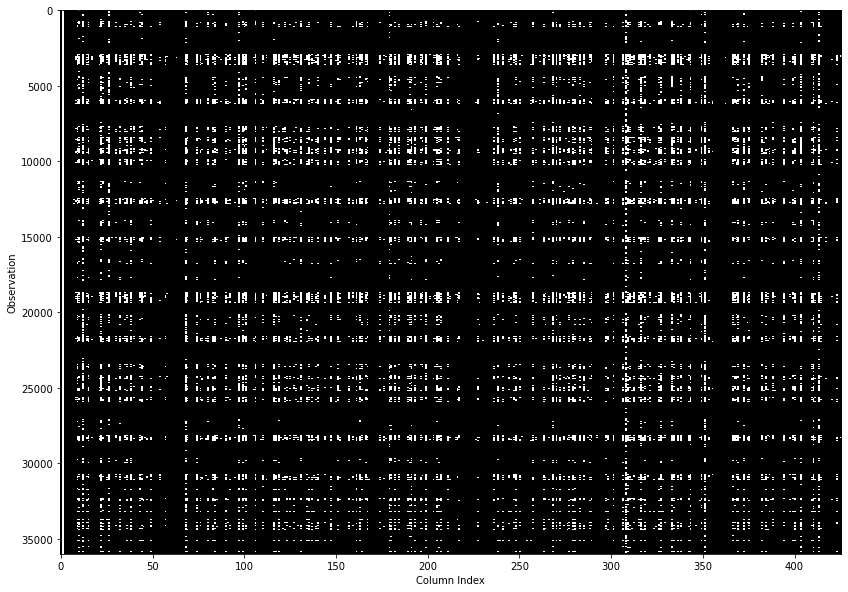

In [22]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(merge_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

ax.set_xlabel("Column Index")
ax.set_ylabel("Observation")

([], [])

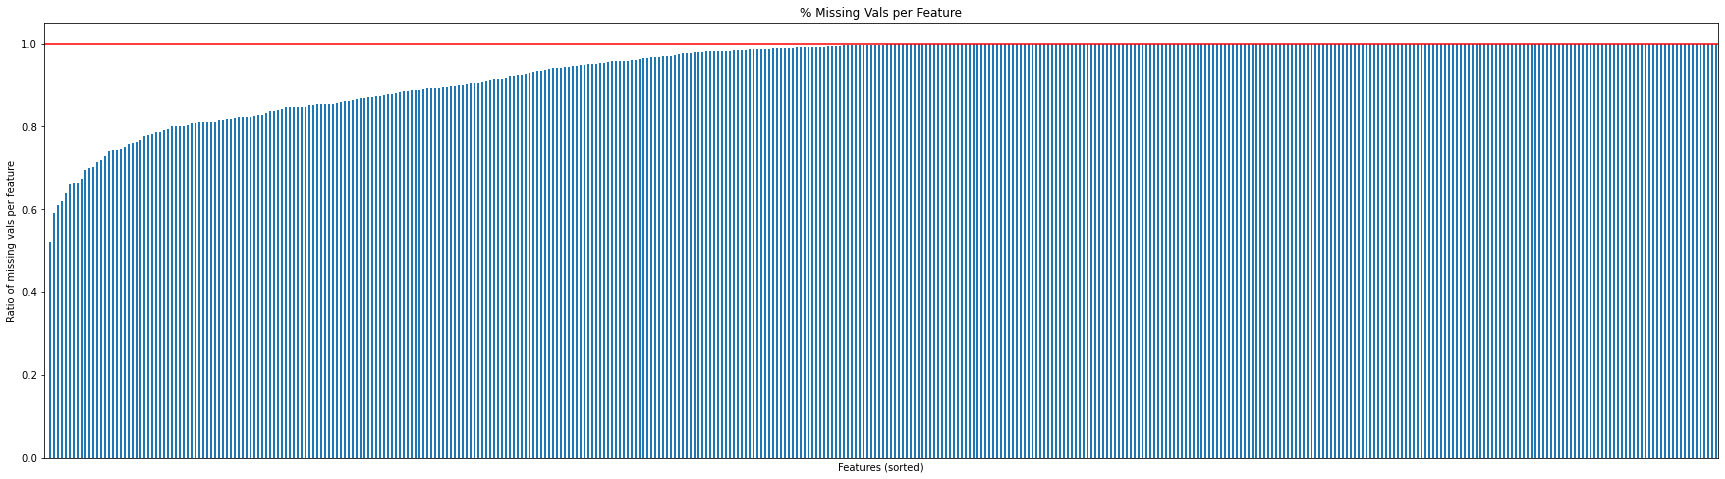

In [25]:
merge_df.notna().mean().sort_values().plot(kind='bar', figsize=(30,8),
                                          title="% Missing Vals per Feature",
                                          ylabel="Ratio of missing vals per feature",
                                          xlabel = "Features (sorted)")
plt.axhline(y=1.0, color = 'r', linestyle="-")
plt.xticks([])

Interestingly enough, the removal of these states significantly increases the number of fully populated columns.

There are still observations which are clearly missing many features, so let's make our observation filtering more stringent:

In [26]:
merge_df[merge_df.transpose().notna().mean().sort_values() < 0.90]["sub_region_1"].value_counts()

/tmp/ipykernel_810/4006487463.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.transpose().notna().mean().sort_values() < 0.90]["sub_region_1"].value_counts()


Hawaii           837
Idaho            837
Maine            837
New Hampshire    837
Rhode Island     837
West Virginia    837
New Mexico       836
Nebraska         794
Mississippi      513
Arkansas         269
Kansas           189
Iowa             154
Nevada            16
Utah              15
Oklahoma          14
Louisiana          3
Name: sub_region_1, dtype: int64

I will remove to Iowa. This leaves us with 31 states of data. Each remaining state still has some missing values, but hopefully these will also decrease as I remove some less-populated features.

In [27]:
dropStates = ["Hawaii", "Idaho", "Maine", "New Hampshire", "Rhode Island", "West Virginia", "New Mexico", "Nebraska", "Mississippi", "Arkansas",
              "Kansas", "Iowa"]
merge_df = merge_df[~merge_df["sub_region_1"].isin(dropStates)]
merge_df.head()

,sub_region_1,sub_region_2,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
366,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-01,2.86,5.05,8.63,0.30,0.88,0.10,...,1.32,0.23,0.36,3.41,0.43,2.52,0.36,0.17,0.36,0.46
367,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-02,2.69,5.27,9.36,0.36,0.92,0.14,...,1.39,0.26,0.47,3.86,0.35,2.50,0.40,0.17,0.45,0.53
368,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-03,2.45,5.12,9.12,0.33,0.93,0.13,...,1.41,0.23,0.43,3.60,0.33,2.19,0.42,0.16,0.47,0.54
369,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-04,2.48,5.19,9.61,0.31,0.82,0.08,...,1.29,0.29,0.40,3.53,0.40,2.62,0.48,0.22,0.47,0.42
370,Alabama,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2020-01-05,2.81,5.12,9.26,0.41,0.81,0.12,...,1.33,0.26,0.38,3.78,0.36,2.71,0.40,0.15,0.46,0.50


In [28]:
# Furthermore, looking at unpopulated features...
cols = merge_df.notna().mean().sort_values(ascending=False)
cols

sub_region_1                       1.000000
symptom:Gingivitis                 1.000000
symptom:Milium                     1.000000
symptom:Migraine                   1.000000
symptom:Middle back pain           1.000000
                                     ...   
symptom:Allergic conjunctivitis    0.812849
symptom:Viral pneumonia            0.811693
symptom:Shallow breathing          0.801673
symptom:Photodermatitis            0.624542
sub_region_2                       0.000000
Length: 426, dtype: float64

In [29]:
keep_symptoms = list(cols[cols > 0.99].index)

In [30]:
merge_df = merge_df[keep_symptoms]
merge_df = merge_df.set_index(["sub_region_1", "date"]).reset_index() # bring these to the front again

In [31]:
merge_df

,sub_region_1,date,symptom:Gingivitis,symptom:Milium,symptom:Migraine,symptom:Middle back pain,symptom:Menorrhagia,symptom:Meningitis,symptom:Melena,symptom:Manic Disorder,...,symptom:Amenorrhea,symptom:Hydrocephalus,symptom:Nocturnal enuresis,symptom:Esophagitis,symptom:Polyuria,symptom:Upper respiratory tract infection,symptom:Granuloma,symptom:Hypocalcaemia,symptom:Asphyxia,symptom:Atheroma
0,Alabama,2020-01-01,0.44,0.30,4.49,0.28,0.71,0.40,0.26,0.57,...,0.12,0.11,0.15,0.14,0.14,0.34,0.12,0.07,0.11,0.12
1,Alabama,2020-01-02,0.47,0.27,4.95,0.40,0.84,0.44,0.34,0.56,...,0.13,0.12,0.15,0.17,0.17,0.37,0.16,0.10,0.12,0.11
2,Alabama,2020-01-03,0.49,0.24,4.71,0.42,0.71,0.53,0.30,0.51,...,0.12,0.17,0.12,0.17,0.13,0.39,0.12,0.11,0.13,0.12
3,Alabama,2020-01-04,0.36,0.31,4.51,0.34,0.74,0.46,0.31,0.55,...,0.11,0.14,0.15,0.10,0.13,0.35,0.13,0.10,0.10,0.15
4,Alabama,2020-01-05,0.36,0.27,4.51,0.44,0.76,0.40,0.29,0.58,...,0.13,0.13,0.14,0.12,0.11,0.21,0.10,0.09,0.12,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25942,Wisconsin,2022-04-12,0.40,0.20,3.83,0.27,0.53,0.49,0.28,0.66,...,0.11,0.15,0.12,0.11,0.11,0.18,0.18,0.15,0.08,0.12
25943,Wisconsin,2022-04-13,0.40,0.19,3.80,0.29,0.57,0.55,0.24,0.65,...,0.12,0.13,0.12,0.13,0.15,0.19,0.18,0.15,0.10,0.14
25944,Wisconsin,2022-04-14,0.39,0.20,3.62,0.28,0.56,0.48,0.26,0.69,...,0.09,0.12,0.13,0.10,0.09,0.15,0.19,0.20,0.09,0.14
25945,Wisconsin,2022-04-15,0.36,0.20,3.47,0.26,0.54,0.38,0.24,0.56,...,0.12,0.11,0.13,0.14,0.09,0.15,0.18,0.15,0.10,0.13


Now once more to visualize features and observations...

([], [])

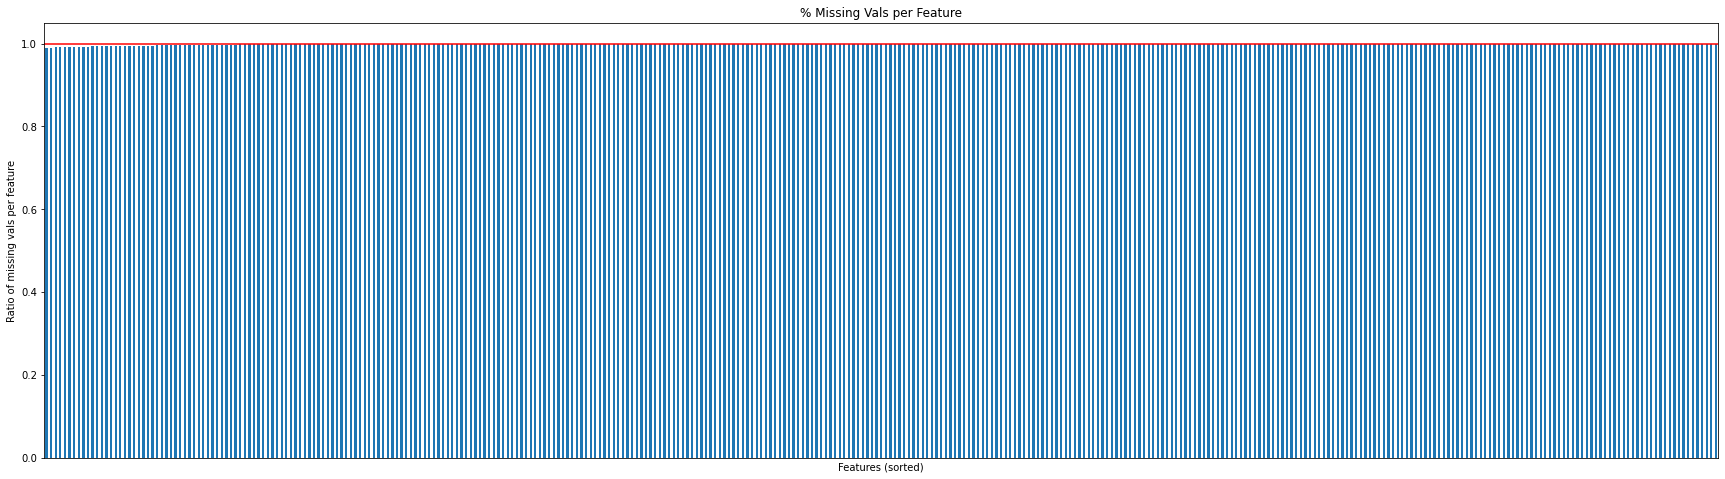

In [34]:
merge_df.notna().mean().sort_values().plot(kind='bar', figsize=(30,8),
                                          title="% Missing Vals per Feature",
                                          ylabel="Ratio of missing vals per feature",
                                          xlabel = "Features (sorted)")
plt.axhline(y=1.0, color = 'r', linestyle="-")
plt.xticks([])

Text(0, 0.5, 'Observation')

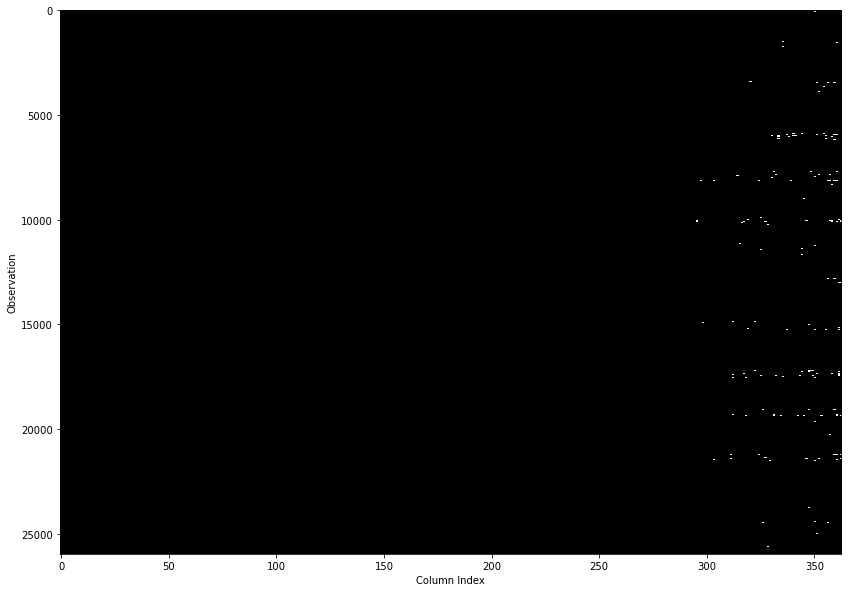

In [35]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(merge_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

ax.set_xlabel("Column Index")
ax.set_ylabel("Observation")

Now to check on which observations are still missing some values...

In [36]:
merge_df[merge_df.transpose().notna().mean().sort_values() < 0.99]["sub_region_1"].value_counts()

/tmp/ipykernel_810/1008112536.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_df[merge_df.transpose().notna().mean().sort_values() < 0.99]["sub_region_1"].value_counts()


Nevada            212
Utah              167
Oklahoma          117
Louisiana          44
Kentucky            9
Oregon              8
Alabama             7
Connecticut         7
South Carolina      2
Name: sub_region_1, dtype: int64

Since these features are likely correlated, I suspect I can impute the remaining 1% of missing features from each observation with the other 99%, as long as the features are missing at random. So I can reasonably stop here.

In [37]:
# Number of states left
len(list(merge_df["sub_region_1"].unique()))

31

In [38]:
merge_df["sub_region_1"].unique()

array(['Alabama', 'Arizona', 'California', 'Colorado', 'Connecticut',
       'Florida', 'Georgia', 'Illinois', 'Indiana', 'Kentucky',
       'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Missouri', 'Nevada', 'New Jersey', 'New York', 'North Carolina',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington',
       'Wisconsin'], dtype=object)

In [40]:
merge_df = merge_df.reset_index(drop=True)
merge_df

,sub_region_1,date,symptom:Gingivitis,symptom:Milium,symptom:Migraine,symptom:Middle back pain,symptom:Menorrhagia,symptom:Meningitis,symptom:Melena,symptom:Manic Disorder,...,symptom:Amenorrhea,symptom:Hydrocephalus,symptom:Nocturnal enuresis,symptom:Esophagitis,symptom:Polyuria,symptom:Upper respiratory tract infection,symptom:Granuloma,symptom:Hypocalcaemia,symptom:Asphyxia,symptom:Atheroma
0,Alabama,2020-01-01,0.44,0.30,4.49,0.28,0.71,0.40,0.26,0.57,...,0.12,0.11,0.15,0.14,0.14,0.34,0.12,0.07,0.11,0.12
1,Alabama,2020-01-02,0.47,0.27,4.95,0.40,0.84,0.44,0.34,0.56,...,0.13,0.12,0.15,0.17,0.17,0.37,0.16,0.10,0.12,0.11
2,Alabama,2020-01-03,0.49,0.24,4.71,0.42,0.71,0.53,0.30,0.51,...,0.12,0.17,0.12,0.17,0.13,0.39,0.12,0.11,0.13,0.12
3,Alabama,2020-01-04,0.36,0.31,4.51,0.34,0.74,0.46,0.31,0.55,...,0.11,0.14,0.15,0.10,0.13,0.35,0.13,0.10,0.10,0.15
4,Alabama,2020-01-05,0.36,0.27,4.51,0.44,0.76,0.40,0.29,0.58,...,0.13,0.13,0.14,0.12,0.11,0.21,0.10,0.09,0.12,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25942,Wisconsin,2022-04-12,0.40,0.20,3.83,0.27,0.53,0.49,0.28,0.66,...,0.11,0.15,0.12,0.11,0.11,0.18,0.18,0.15,0.08,0.12
25943,Wisconsin,2022-04-13,0.40,0.19,3.80,0.29,0.57,0.55,0.24,0.65,...,0.12,0.13,0.12,0.13,0.15,0.19,0.18,0.15,0.10,0.14
25944,Wisconsin,2022-04-14,0.39,0.20,3.62,0.28,0.56,0.48,0.26,0.69,...,0.09,0.12,0.13,0.10,0.09,0.15,0.19,0.20,0.09,0.14
25945,Wisconsin,2022-04-15,0.36,0.20,3.47,0.26,0.54,0.38,0.24,0.56,...,0.12,0.11,0.13,0.14,0.09,0.15,0.18,0.15,0.10,0.13


Since most observations of each state have at least 99% of the values populated, I will use iterative linear multiple imputation to fill in the remaining missing values. I'm using a L1-regularized linear regression because I suspect that each missing feature is correlated to a limited set of other features (as each symptom group likely shares common search terms with each other), and I don't want the noise of a larger cohort of unimportant features to lead to overfitting. I suspect these features are highly correlated so I'm going to assume that this regression is accurate. If I had time, I could test this by randomly dropping some datapoints and computing the rmse between the real and imputed values.

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

brlr = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan,
                        random_state=42, imputation_order='ascending',
                       skip_complete=True)


## removing metadata from dataframe, as BayesianRidge can't dummy code categorical variables
merge_df_noInfoCols = merge_df.drop(["place_id"], axis=1).set_index(["sub_region_1", "date"])

brlr.fit(merge_df_noInfoCols)

merge_df_imputed = brlr.transform(merge_df_noInfoCols)

array([[0.44, 0.3 , 4.49, ..., 0.07, 0.11, 0.12],
       [0.47, 0.27, 4.95, ..., 0.1 , 0.12, 0.11],
       [0.49, 0.24, 4.71, ..., 0.11, 0.13, 0.12],
       ...,
       [0.39, 0.2 , 3.62, ..., 0.2 , 0.09, 0.14],
       [0.36, 0.2 , 3.47, ..., 0.15, 0.1 , 0.13],
       [0.34, 0.2 , 3.43, ..., 0.1 , 0.1 , 0.09]])

In [42]:
pd.DataFrame(merge_df_imputed)

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.44,0.30,4.49,0.28,0.71,0.40,0.26,0.57,3.16,2.74,...,0.12,0.11,0.15,0.14,0.14,0.34,0.12,0.07,0.11,0.12
1,0.47,0.27,4.95,0.40,0.84,0.44,0.34,0.56,4.35,3.35,...,0.13,0.12,0.15,0.17,0.17,0.37,0.16,0.10,0.12,0.11
2,0.49,0.24,4.71,0.42,0.71,0.53,0.30,0.51,4.18,3.08,...,0.12,0.17,0.12,0.17,0.13,0.39,0.12,0.11,0.13,0.12
3,0.36,0.31,4.51,0.34,0.74,0.46,0.31,0.55,3.46,3.04,...,0.11,0.14,0.15,0.10,0.13,0.35,0.13,0.10,0.10,0.15
4,0.36,0.27,4.51,0.44,0.76,0.40,0.29,0.58,3.46,2.96,...,0.13,0.13,0.14,0.12,0.11,0.21,0.10,0.09,0.12,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25942,0.40,0.20,3.83,0.27,0.53,0.49,0.28,0.66,4.24,2.70,...,0.11,0.15,0.12,0.11,0.11,0.18,0.18,0.15,0.08,0.12
25943,0.40,0.19,3.80,0.29,0.57,0.55,0.24,0.65,4.08,2.65,...,0.12,0.13,0.12,0.13,0.15,0.19,0.18,0.15,0.10,0.14
25944,0.39,0.20,3.62,0.28,0.56,0.48,0.26,0.69,3.79,2.47,...,0.09,0.12,0.13,0.10,0.09,0.15,0.19,0.20,0.09,0.14
25945,0.36,0.20,3.47,0.26,0.54,0.38,0.24,0.56,3.28,2.43,...,0.12,0.11,0.13,0.14,0.09,0.15,0.18,0.15,0.10,0.13


In [43]:
merge_df = merge_df.drop("place_id", axis=1)
cols = merge_df.columns

In [44]:
### adding back the metadata after checking that the order of indices was retained:

metadata = merge_df[["sub_region_1", "date"]]
new_df_imputed = metadata.merge(pd.DataFrame(merge_df_imputed), left_index=True, right_index=True)
new_df_imputed.columns = cols
new_df_imputed

,sub_region_1,date,symptom:Gingivitis,symptom:Milium,symptom:Migraine,symptom:Middle back pain,symptom:Menorrhagia,symptom:Meningitis,symptom:Melena,symptom:Manic Disorder,...,symptom:Amenorrhea,symptom:Hydrocephalus,symptom:Nocturnal enuresis,symptom:Esophagitis,symptom:Polyuria,symptom:Upper respiratory tract infection,symptom:Granuloma,symptom:Hypocalcaemia,symptom:Asphyxia,symptom:Atheroma
0,Alabama,2020-01-01,0.44,0.30,4.49,0.28,0.71,0.40,0.26,0.57,...,0.12,0.11,0.15,0.14,0.14,0.34,0.12,0.07,0.11,0.12
1,Alabama,2020-01-02,0.47,0.27,4.95,0.40,0.84,0.44,0.34,0.56,...,0.13,0.12,0.15,0.17,0.17,0.37,0.16,0.10,0.12,0.11
2,Alabama,2020-01-03,0.49,0.24,4.71,0.42,0.71,0.53,0.30,0.51,...,0.12,0.17,0.12,0.17,0.13,0.39,0.12,0.11,0.13,0.12
3,Alabama,2020-01-04,0.36,0.31,4.51,0.34,0.74,0.46,0.31,0.55,...,0.11,0.14,0.15,0.10,0.13,0.35,0.13,0.10,0.10,0.15
4,Alabama,2020-01-05,0.36,0.27,4.51,0.44,0.76,0.40,0.29,0.58,...,0.13,0.13,0.14,0.12,0.11,0.21,0.10,0.09,0.12,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25942,Wisconsin,2022-04-12,0.40,0.20,3.83,0.27,0.53,0.49,0.28,0.66,...,0.11,0.15,0.12,0.11,0.11,0.18,0.18,0.15,0.08,0.12
25943,Wisconsin,2022-04-13,0.40,0.19,3.80,0.29,0.57,0.55,0.24,0.65,...,0.12,0.13,0.12,0.13,0.15,0.19,0.18,0.15,0.10,0.14
25944,Wisconsin,2022-04-14,0.39,0.20,3.62,0.28,0.56,0.48,0.26,0.69,...,0.09,0.12,0.13,0.10,0.09,0.15,0.19,0.20,0.09,0.14
25945,Wisconsin,2022-04-15,0.36,0.20,3.47,0.26,0.54,0.38,0.24,0.56,...,0.12,0.11,0.13,0.14,0.09,0.15,0.18,0.15,0.10,0.13


In [76]:
new_df_imputed.to_csv("covid_searches_cleaned_imputed.csv", index=False)